# Quantum cuboid renormalisation - different - geometric

## Basic definitions

### Determinant of Hessian matrix

In [ ]:
using Plots

: 

In [2]:
cd("Intertwiners")

## Define intertwiners from txt Files

In [ ]:
function fromTxt2(name::String, j::Vector{Int})

    io = open(name,"r")
    s = read(io,String)
    close(io)

    s = split(s)
    s = String.(s)
    sz = Int(size(s)[1]/3)
    s = reshape(s,3,sz)
    s = s[1,:].*s[2,:].*s[3,:]
    vec = [parse(Complex{Float64},ss) for ss in s]

    arr = permutedims(reshape(vec,j[3],j[3],j[1],j[3],j[3],j[2]),[6,5,4,3,2,1])
    return arr
end


function loadInts(j::Vector) # j is a vector such as [2,2,2] or [3,3,3]

    name = "Int2j" * string("[",j[1],", ",j[2],", ",j[3],"]") * ".txt"
    int2 = fromTxt2(name,[j[1],j[2],j[3]].+1)

    return int2

end


: 

In [4]:
loadInts([1,3,3])

4×4×4×2×4×4 Array{Complex{Float64},6}:
[:, :, 1, 1, 1, 1] =
       0.0+0.0im             0.0+0.0im         …  0.0+0.0im
 0.0138726+0.0138726im       0.0+0.0im            0.0+0.0im
       0.0+0.0im        0.013834-0.00582501im     0.0+0.0im
       0.0+0.0im             0.0+0.0im            0.0+0.0im

[:, :, 2, 1, 1, 1] =
 0.00336304-0.0172356im  …           0.0+0.0im
        0.0+0.0im                    0.0+0.0im
        0.0+0.0im                    0.0+0.0im
        0.0+0.0im           -0.000840761-7.18411e-19im

[:, :, 3, 1, 1, 1] =
 0.0+0.0im  0.00800935+0.00145624im  …           0.0+0.0im
 0.0+0.0im         0.0+0.0im                     0.0+0.0im
 0.0+0.0im         0.0+0.0im            -0.000728126-3.41228e-19im
 0.0+0.0im         0.0+0.0im                     0.0+0.0im

[:, :, 4, 1, 1, 1] =
 0.0+0.0im  0.0+0.0im  2.08543e-11+0.00294267im          0.0+0.0im
 0.0+0.0im  0.0+0.0im          0.0+0.0im         1.66077e-11+1.10323e-18im
 0.0+0.0im  0.0+0.0im          0.0+0.0im            

# Semi-classical function for the norm of intertwiners

In [5]:
function semi_norm(j1::Float64,j2::Float64,j3::Float64)
    
    phi = acos((j2-j1)/ (4*j3))
   
    det = j3 / 2 * sin(phi)^2 * (j1 + j2 + 2*j3 * (1 + cos(phi)^2))^2
    
    res = (2 * pi)^(3/2) * 2 / (4*pi)^2
    res /= sqrt(det)
    
    res
end

semi_norm (generic function with 1 method)

In [6]:
semi_norm(0.5,1.5,1.5)

0.045953445310349

## Read in intertwiners and compute norm

In [7]:
function full_norm(j1::Int,j2::Int,j3::Int)
    
    int = loadInts([j1,j2,j3])
    
    res = sum(abs.(int).^2)
    
    return res
    
end


full_norm (generic function with 1 method)

In [8]:
full_norm(1,3,3)

0.040177197217003205

# Data from calculating intertwiner norm

In [9]:
data = zeros(Complex{Float64},10,10,10);

data[1,1,1] = full_norm(1,1,1);
data[2,2,2] = full_norm(2,2,2);
#data[3,3,3] = full_norm(3,3,3);
#data[4,4,4] = full_norm(4,4,4);
#data[5,5,5] = full_norm(5,5,5);
#data[6,6,6] = full_norm(6,6,6);
#data[7,7,7] = full_norm(7,7,7);
#data[8,8,8] = full_norm(8,8,8);
#data[9,9,9] = full_norm(9,9,9);

In [10]:
plotdata_semi = [semi_norm(i,i,i) for i in 0.5:0.5:1.0]

2-element Array{Float64,1}:
 0.19947114020071635
 0.07052369794346953

In [11]:
plotdata_full = [real(data[i,i,i]) for i in 1:2]

2-element Array{Float64,1}:
 0.14583330642379352
 0.05952402173384934

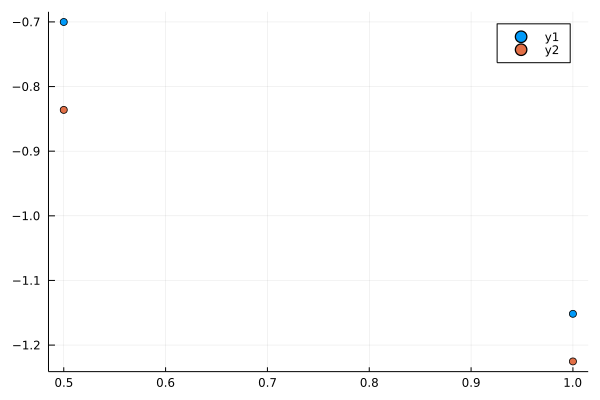

In [12]:
scatter(0.5:0.5:1.0,[ log.(10,plotdata_semi) log.(10,plotdata_full)])

In [13]:
rel_error = abs.(plotdata_full .- plotdata_semi) ./ (plotdata_full)

2-element Array{Float64,1}:
 0.36780235662387417
 0.18479390150758318

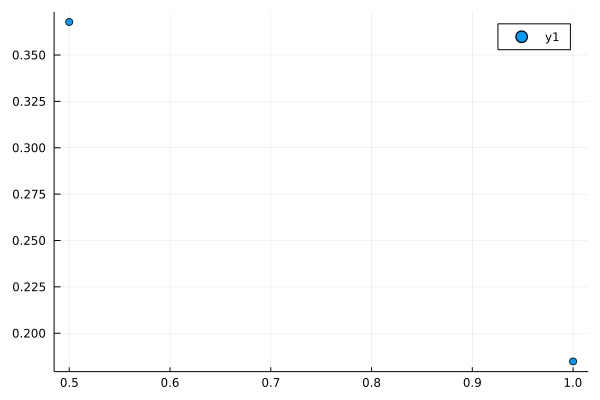

In [14]:
scatter(0.5:0.5:1.0,[ rel_error ])

In [15]:
data[1,2,2] = full_norm(1,2,2);
data[1,3,3] = full_norm(1,3,3);
#data[1,4,4] = full_norm(1,4,4);
data[1,5,5] = full_norm(1,5,5);
#data[1,6,6] = full_norm(1,6,6);
data[1,7,7] = full_norm(1,7,7);
#data[1,8,8] = full_norm(1,8,8);
data[1,9,9] = full_norm(1,9,9);

In [16]:
plotdata_semi_2 = [semi_norm(0.5,i,i) for i in 0.5:0.5:4.5]

9-element Array{Float64,1}:
 0.19947114020071635
 0.08051676455378808
 0.045953445310349
 0.03058036185765549
 0.022206268914473155
 0.017060883800851814
 0.013635373773717102
 0.011220237681430286
 0.009442459159339112

In [17]:
plotdata_full_2 = [real(data[1,i,i]) for i in 1:9]

9-element Array{Float64,1}:
 0.14583330642379352
 0.0
 0.040177197217003205
 0.0
 0.020391566177369
 0.0
 0.012808461393660223
 0.0
 0.008990725569948671

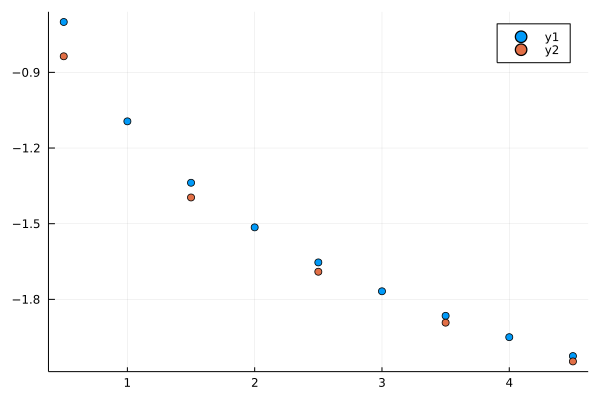

In [18]:
scatter(0.5:0.5:4.5,[ log.(10,plotdata_semi_2) log.(10,plotdata_full_2)])

In [19]:
rel_error_2 = abs.(plotdata_full_2 .- plotdata_semi_2) ./ (plotdata_full_2)

9-element Array{Float64,1}:
  0.36780235662387417
 Inf
  0.1437693142741489
 Inf
  0.08899280816978881
 Inf
  0.06455985263508499
 Inf
  0.05024439750450744

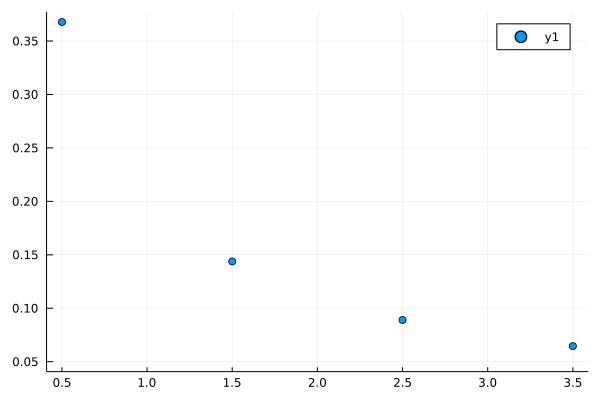

In [20]:
scatter(0.5:0.5:3.5,[ rel_error_2 ])

In [41]:
data[2,2,2] = full_norm(2,2,2);
data[2,4,4] = full_norm(2,4,4);
data[2,6,6] = full_norm(2,6,6);
data[2,8,8] = full_norm(2,8,8);
#data[5,10,5] = full_norm(5,10,5);
#data[1,7,7] = full_norm(1,7,7);
#data[1,8,8] = full_norm(1,8,8);
#data[1,9,9] = full_norm(1,9,9);

In [42]:
plotdata_semi_3 = [semi_norm(1.,i,i) for i in 0.5:0.5:4.0]

8-element Array{Float64,1}:
 0.16079056214298626
 0.07052369794346953
 0.04186566839541372
 0.028466975107592097
 0.020952577017152918
 0.016246996398916465
 0.01307228434003177
 0.010811790620343322

In [43]:
plotdata_full_3 = [real(data[2,i,i]) for i in 1:8]

8-element Array{Float64,1}:
 0.0
 0.05952402173384934
 0.0
 0.025800598553035847
 0.0
 0.015158072594110698
 0.0
 0.010248217526747965

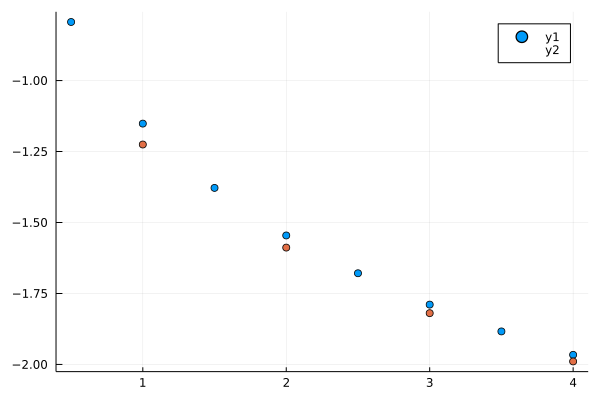

In [45]:
scatter(0.5:0.5:4.0,[ log.(10,plotdata_semi_3) log.(10,plotdata_full_3)])

In [46]:
rel_error_3 = abs.(plotdata_full_3 .- plotdata_semi_3) ./ (plotdata_full_3)

8-element Array{Float64,1}:
 Inf
  0.18479390150758318
 Inf
  0.10334553088275188
 Inf
  0.07183788031394192
 Inf
  0.05499230399085738

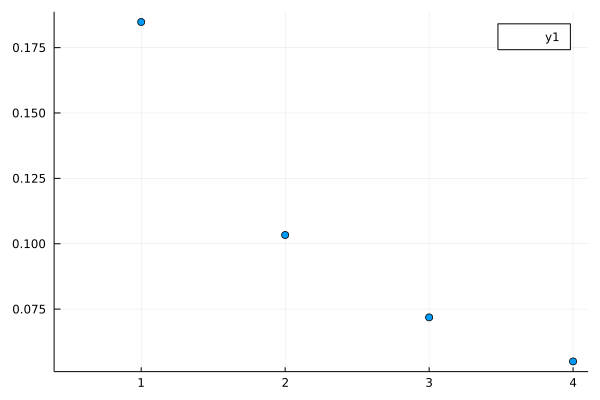

In [48]:
scatter(0.5:0.5:4.0,[ rel_error_3 ])

In [35]:
data[1,2,1] = full_norm(1,2,1);
data[2,4,2] = full_norm(2,4,2);
data[3,6,3] = full_norm(3,6,3);
data[4,8,4] = full_norm(4,8,4);
data[5,10,5] = full_norm(5,10,5);
#data[1,7,7] = full_norm(1,7,7);
#data[1,8,8] = full_norm(1,8,8);
#data[1,9,9] = full_norm(1,9,9);

In [36]:
plotdata_semi_4 = [semi_norm(i,2*i,i) for i in 0.5:0.5:2.5]

5-element Array{Float64,1}:
 0.16079056214298623
 0.05684804842105127
 0.030944158112134783
 0.02009882026787328
 0.014381545083684858

In [37]:
plotdata_full_4 = [real(data[i,2*i,i]) for i in 1:5]

5-element Array{Float64,1}:
 0.0
 0.04865941235927991
 0.0
 0.018551753240336432
 0.0

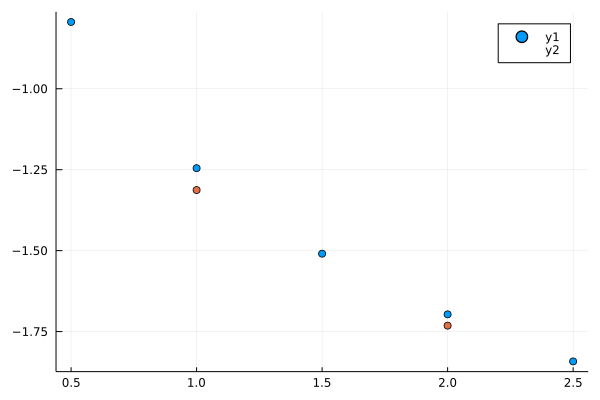

In [38]:
scatter(0.5:0.5:2.5,[ log.(10,plotdata_semi_4) log.(10,plotdata_full_4)])

In [39]:
rel_error_4 = abs.(plotdata_full_4 .- plotdata_semi_4) ./ (plotdata_full_4)

5-element Array{Float64,1}:
 Inf
  0.16828472981362855
 Inf
  0.08339195802653913
 Inf

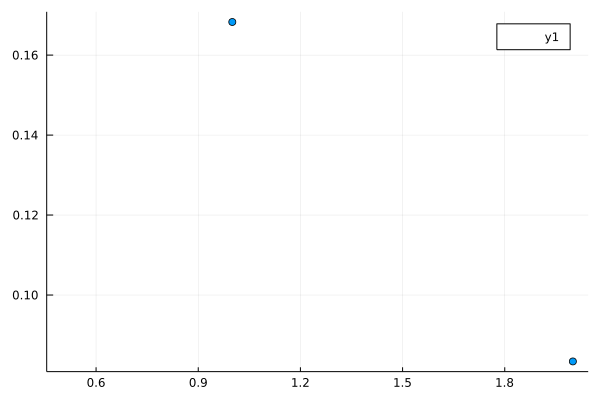

In [40]:
scatter(0.5:0.5:2.0,[ rel_error_4 ])